In [ ]:
%matplotlib notebook
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sn
import random as rnd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, auc, f1_score ,confusion_matrix, accuracy_score ,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support as score

In [ ]:
#Function for cleaning our data

def preprocess_data(df):
    df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis='columns', inplace=True)
    df['Family'] = df['SibSp'] + df['Parch'] + 1
    df = df.drop(['SibSp', 'Parch'], axis=1)

    df.Sex.replace(['male', 'female'], [1, 0], inplace=True)
    df.Embarked.replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)

    # Fill missing values
    df.Age = df.Age.fillna(df.Age.median())
    df.Embarked = df.Embarked.fillna(1)  # Filling with '1' as per your original code
    df.Pclass = df.Pclass.fillna(0)  # Filling with '0' as per your original code

    return df

In [ ]:
# Load the dataset
train_data_path = 'train.csv'  # Replace with your train data file path
train_data1 = pd.read_csv(train_data_path)
train_data= preprocess_data(train_data1)

In [ ]:
target = 'Survived'
# Split the data into training and test sets
X = train_data.drop(target,axis=1)
y = train_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

## **SVM Classifier**

In [ ]:
# Hyperparameter tuning setup
param_grid = {
    'C': [0.1,1,10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [ ]:
# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=7, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
# Evaluate the model on the test set
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

# Generate the confusion matrix
cm_SVM = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm_SVM)

# Calculate  accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:")
print(f"{accuracy:.2f}")

#Calculate Classification report
classification_rep=classification_report(y_test, y_test_pred)
classification_rep_SVM = classification_report(y_test, y_test_pred,output_dict=True)
print("Classification Report:")
print(classification_rep)

Confusion Matrix:
[[67 11]
 [17 39]]
Accuracy:
0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        78
           1       0.78      0.70      0.74        56

    accuracy                           0.79       134
   macro avg       0.79      0.78      0.78       134
weighted avg       0.79      0.79      0.79       134



Text(0.5, 1.0, 'Confusion Matrix')

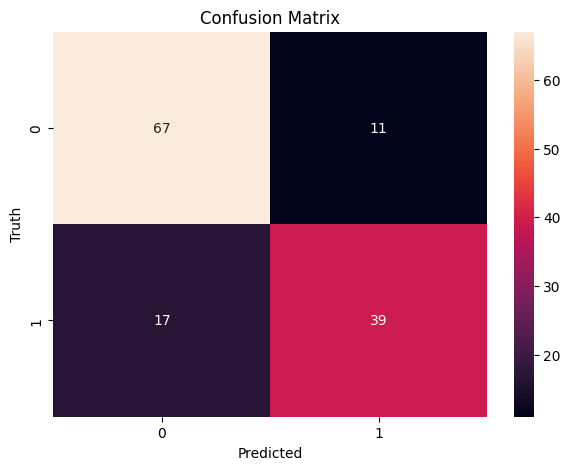

In [ ]:
plt.figure(figsize=(7,5))
sn.heatmap(cm_SVM, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')

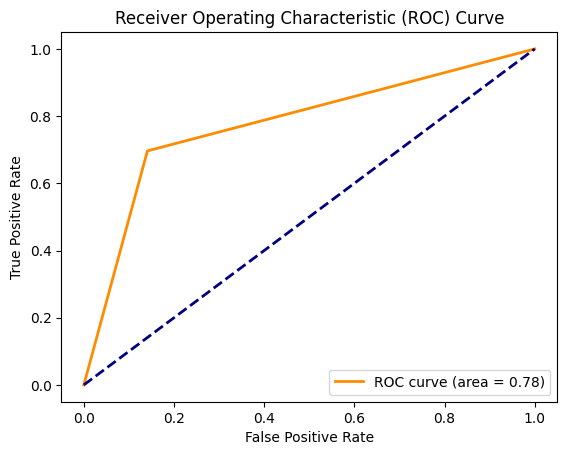

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### **KNN Classifier:**

In [ ]:
#data before cleaning

train_data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family
0,0,3,male,22.0,1,0,S,2
1,1,1,female,38.0,1,0,C,2
2,1,3,female,26.0,0,0,S,1
3,1,1,female,35.0,1,0,S,2
4,0,3,male,35.0,0,0,S,1


In [ ]:
#Wo show if there is any missing values in out tabke and where
train_data1.columns[train_data1.isna().any()]

Index(['Age', 'Embarked'], dtype='object')

In [ ]:
#Showing the place that hava missing value in Age

train_data1.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [ ]:
#data after cleaning

train_data.head()

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,1,22.0,1.0,2
1,1,1,0,38.0,2.0,2
2,1,3,0,26.0,1.0,1
3,1,1,0,35.0,1.0,2
4,0,3,1,35.0,1.0,1


In [ ]:
#Showing the Age after doning the process on it and filling the missing

train_data.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

Text(0.5, 1.2, 'Distribution of Age for Survived and Non-Survived Passengers')

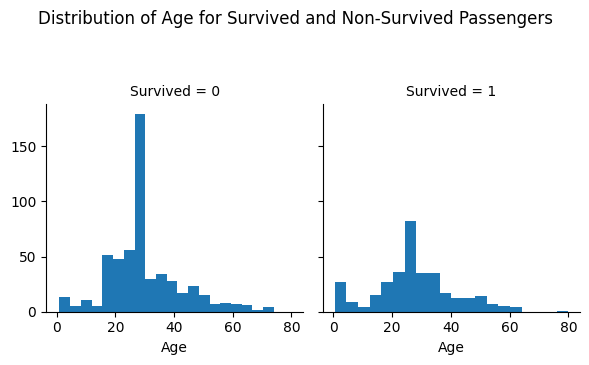

In [ ]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)
g.fig.suptitle('Distribution of Age for Survived and Non-Survived Passengers', y=1.2)

In [ ]:
#ٍSplitting the data to training, validation and testing
X_trainn, X_valid, Y_trainn, Y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=425)

In [ ]:
#Finding the optimal hyperparameters using the validation data

final_scores = []
for i in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_trainn, Y_trainn)
    pred = knn.predict(X_valid)
    acc = accuracy_score(Y_valid, pred, normalize=True) * float(100)
    final_scores.append(acc)
    print('\n CV accuracy for k=%d is %d'%(i,acc))


 CV accuracy for k=1 is 74

 CV accuracy for k=3 is 71

 CV accuracy for k=5 is 72

 CV accuracy for k=7 is 73

 CV accuracy for k=9 is 73

 CV accuracy for k=11 is 71

 CV accuracy for k=13 is 68

 CV accuracy for k=15 is 72

 CV accuracy for k=17 is 72

 CV accuracy for k=19 is 69

 CV accuracy for k=21 is 69

 CV accuracy for k=23 is 66

 CV accuracy for k=25 is 65

 CV accuracy for k=27 is 63

 CV accuracy for k=29 is 63


In [ ]:
#Getting the chossing the optimal k

optimal_k = final_scores.index(max(final_scores))
if optimal_k == 0:
    final_scores.remove(max(final_scores))
    optimal_k = final_scores.index(max(final_scores))

print(optimal_k)

2


In [ ]:
# Create a KNN classifier & fitting it

knn = KNeighborsClassifier(optimal_k, leaf_size=17, p=2)
knn.fit(X_trainn, Y_trainn)

KNeighborsClassifier(leaf_size=17, n_neighbors=2)

In [ ]:
#Predicting the test data & printing it

y_pred = knn.predict(X_test)
print(y_pred)

[0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1]


Text(0.5, 1.0, 'Confusion Matrix')

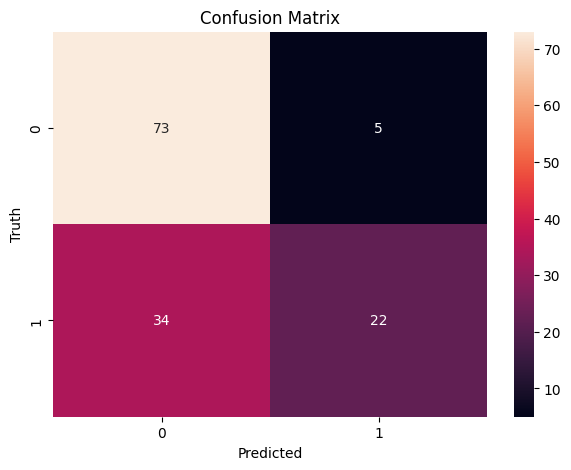

In [ ]:
#Getting the Confusion matrix, Ploting it

cm_KNN = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sn.heatmap(cm_KNN, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')

In [ ]:
#Getting the Accurancy, Precision, Recall, F1 Score of this Classifier

knn_accy = round(accuracy_score(y_test, y_pred), 3)
classification_rep=classification_report(y_test, y_pred)
classification_rep_KNN = classification_report(y_test, y_pred,output_dict=True)

print(f'Accuracy: {knn_accy}')
print("Classification Report:")
print(classification_rep)

Accuracy: 0.709
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.94      0.79        78
           1       0.81      0.39      0.53        56

    accuracy                           0.71       134
   macro avg       0.75      0.66      0.66       134
weighted avg       0.74      0.71      0.68       134



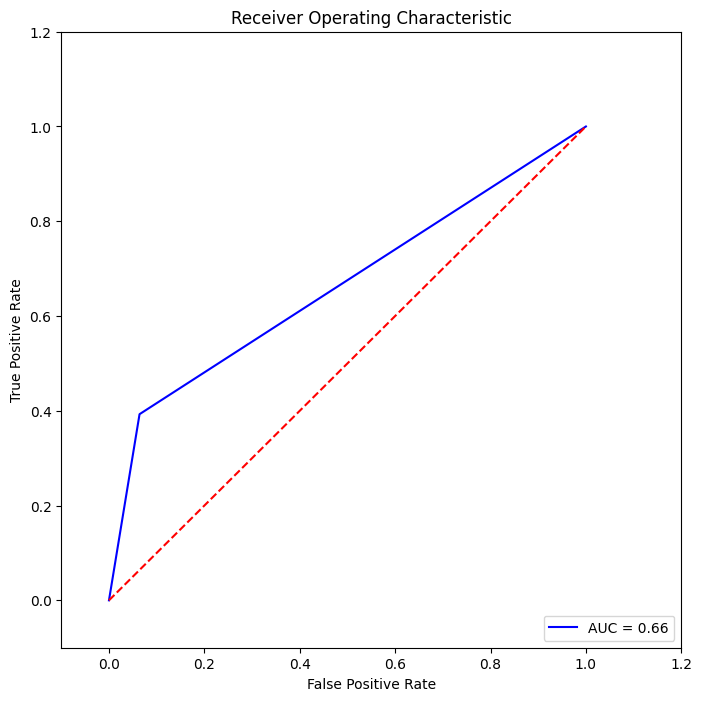

In [ ]:
#Plot the ROC curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(8, 8))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## **Bayes Classifier**

In [ ]:
train_data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family
0,0,3,male,22.0,1,0,S,2
1,1,1,female,38.0,1,0,C,2
2,1,3,female,26.0,0,0,S,1
3,1,1,female,35.0,1,0,S,2
4,0,3,male,35.0,0,0,S,1


In [ ]:
print(train_data1.columns.values)

['Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Embarked' 'Family']


In [ ]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
 7   Family    891 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [ ]:
train_data1.describe()

,Survived,Pclass,Age,SibSp,Parch,Family
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,1.904602
std,0.486592,0.836071,14.526497,1.102743,0.806057,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,2.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,11.000000


In [ ]:

# Display the processed DataFrame
print("\nProcessed DataFrame:")
print(train_data)


Processed DataFrame:
     Survived  Pclass  Sex   Age  Embarked  Family
0           0       3    1  22.0       1.0       2
1           1       1    0  38.0       2.0       2
2           1       3    0  26.0       1.0       1
3           1       1    0  35.0       1.0       2
4           0       3    1  35.0       1.0       1
..        ...     ...  ...   ...       ...     ...
886         0       2    1  27.0       1.0       1
887         1       1    0  19.0       1.0       1
888         0       3    0  28.0       1.0       4
889         1       1    1  26.0       2.0       1
890         0       3    1  32.0       3.0       1

[891 rows x 6 columns]


Text(0.5, 1.2, 'Distribution of Age for Survived and Non-Survived Passengers')

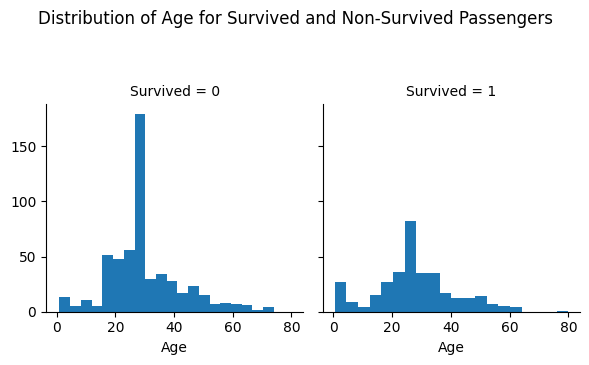

In [ ]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)
g.fig.suptitle('Distribution of Age for Survived and Non-Survived Passengers', y=1.2)

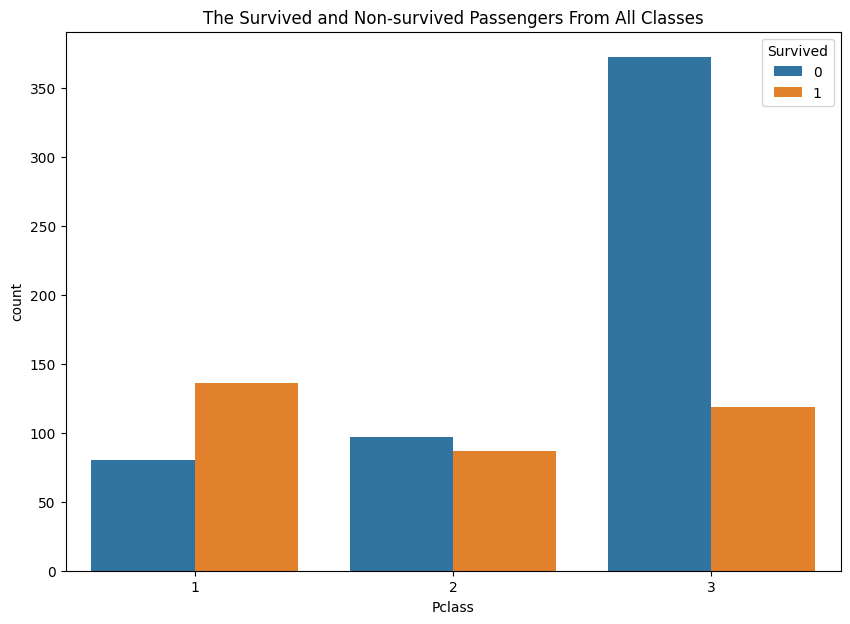

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.countplot(train_data, x='Pclass', hue='Survived')
plt.title('The Survived and Non-survived Passengers From All Classes')
plt.show()

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm_BAYES = confusion_matrix(y_test, y_pred)
classification_rep=classification_report(y_test, y_pred)
classification_rep_BAYES = classification_report(y_test, y_pred,output_dict=True)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(cm_BAYES)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.75
Confusion Matrix:
[[60 18]
 [15 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        78
           1       0.69      0.73      0.71        56

    accuracy                           0.75       134
   macro avg       0.75      0.75      0.75       134
weighted avg       0.76      0.75      0.75       134



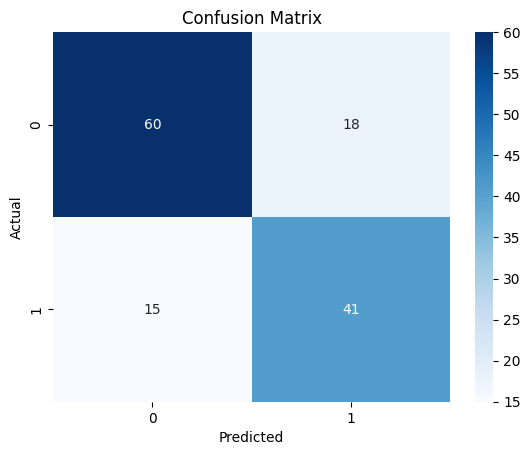

In [ ]:
cm_BAYES = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_BAYES, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

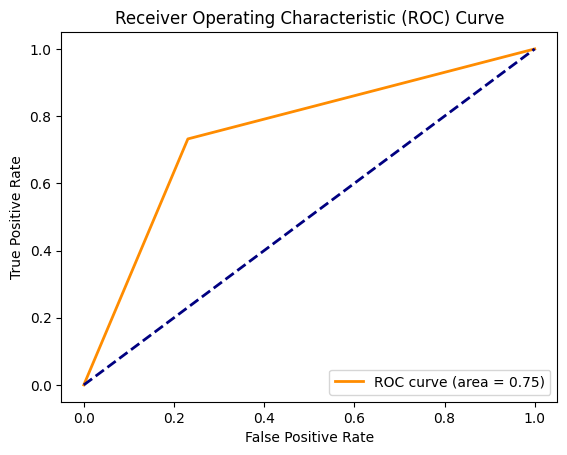

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## **Compare Between Classifiers Score**

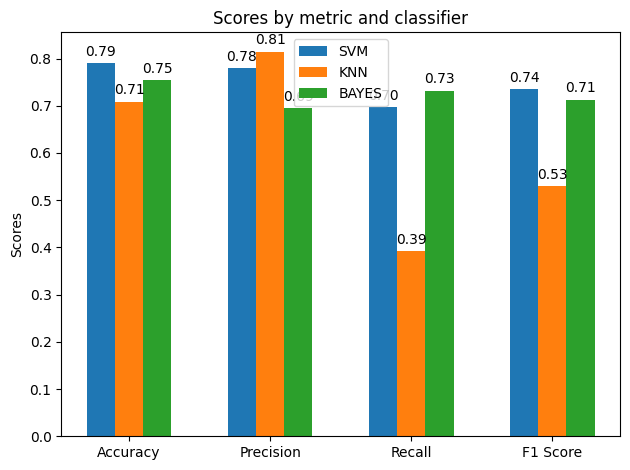

In [ ]:
SVM_Metrix = [classification_rep_SVM['accuracy'], classification_rep_SVM['1']['precision'], classification_rep_SVM['1']['recall'], classification_rep_SVM['1']['f1-score']]
KNN_Metrix = [classification_rep_KNN['accuracy'], classification_rep_KNN['1']['precision'], classification_rep_KNN['1']['recall'], classification_rep_KNN['1']['f1-score']]
BAYES_Metrix= [classification_rep_BAYES['accuracy'], classification_rep_BAYES['1']['precision'], classification_rep_BAYES['1']['recall'], classification_rep_BAYES['1']['f1-score']]
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, SVM_Metrix, width, label='SVM')
rects2 = ax.bar(x, KNN_Metrix, width, label='KNN')
rects3 = ax.bar(x + width, BAYES_Metrix, width, label='BAYES')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by metric and classifier')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3, fmt='%.2f')
ax.bar_label(rects2, padding=3, fmt='%.2f')
ax.bar_label(rects3, padding=3, fmt='%.2f')

fig.tight_layout()

plt.show()
